In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

每当想要根据给定输入预测某个结果，并且还有输入/输出对的示例时，都应该使用监督学习。这些输入/输出对构成了训练集，我们利用它来构建机器学习模型。我们的目标是对从未见过的新数据做出准确预测。

## 2.1 分类与回归
监督机器学习问题主要有两种，分别叫作分类(classiﬁcation)与回归(regression)。

`分类`问题的目标是预测类别标签，这些标签来自预定义的可选列表。分类问题有时可分为二分类(binary classiﬁcation，在两个类别之间进行区分的一种特殊情况)和多分类(multiclass classiﬁcation，在两个以上的类别之间进行区分)。

在二分类问题中，我们通常将其中一个类别称为正类(positive class)，另一个类别称为反类(negative class)。这里的“正”并不代表好的方面或正数，而是代表研究对象。因此在寻找垃圾邮件时，“正”可能指的是垃圾邮件这一类别。将两个类别中的哪一个作为“正类”，往往是主观判断，与具体的领域有关。

`回归`任务的目标是预测一个连续值。根据教育水平、年龄和居住地来预测一个人的年收入，这就是回归的一个例子。

区分分类任务和回归任务有一个简单方法，就是问一个问题：输出是否具有某种连续性。如果在可能的结果之间具有连续性，那么它就是一个回归问题。

## 2.2 泛化、过拟合与欠拟合
如果一个模型能够对没见过的数据做出准确预测，我们就说它能够从训练集`泛化(generalize)`到测试集。我们想要构建一个泛化精度尽可能高的模型。

通常来说，我们构建模型，使其在训练集上能够做出准确预测。如果训练集和测试集足够相似，我们预计模型在测试集上也能做出准确预测。不过在某些情况下这一点并不成立。

如果你在拟合模型时过分关注训练集的细节，得到了一个在训练集上表现很好、但不能泛化到新数据上的模型，那么就存在`过拟合(overﬁtting)`。 与之相反，如果你的模型过于简单，那么你可能无法抓住数据的全部内容以及数据中的变化，你的模型甚至在训练集上的表现就很差。选择过于简单的模型被称为`欠拟合(underﬁtting)`。

我们的模型越复杂，在训练数据上的预测结果就越好。但是，如果我们的模型过于复杂，我们开始过多关注训练集中每个单独的数据点，模型就不能很好地泛化到新数据上。二者之间存在一个最佳位置，可以得到最好的泛化性能。这就是我们想要的模型。

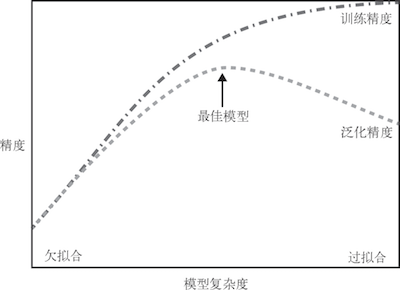

**模型复杂度与数据集大小的关系**
需要注意，模型复杂度与训练数据集中输入的变化密切相关：数据集中包含的数据点的变化范围越大，在不发生过拟合的前提下你可以使用的模型就越复杂。通常来说，收集更多的数据点可以有更大的变化范围，所以更大的数据集可以用来构建更复杂的模型。但是，仅复制相同的数据点或收集非常相似的数据是无济于事的。

收集更多数据，适当构建更复杂的模型，对监督学习任务往往特别有用。

## 2.3 监督学习算法

### 2.3.1 一些样本数据集
我们将使用一些数据集来说明不同的算法。其中一些数据集很小，而且是模拟的，其目的是强调算法的某个特定方面。其他数据集都是现实世界的大型数据集。

**forge数据集**
forge数据集模拟二分类数据，它有两个特征。下图是其散点图，X轴和Y轴表示两个特征：

X.shape: (26, 2)


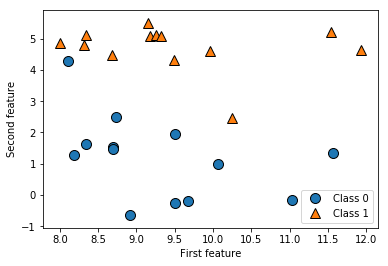

In [2]:
# 生成数据集
X, y = mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
plt.show()

**wave数据集**
wave数据集只有一个输入特征和一个连续的目标变量，后者是模型想要预测的对象。下面绘制的图像中单一特征位于x轴，回归目标位于y轴：

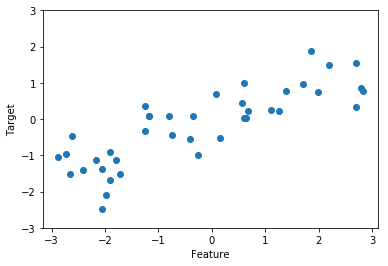

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

我们之所以使用这些简单的低维数据集，是因为它们的可视化非常简单，很难展示特征数超过两个的数据。从特征较少的数据集(也叫低维数据集)中得出的结论可能并不适用于特征较多的数据集(也叫高维数据集)。只要你记住这一点，那么在低维数据集上研究算法也是很有启发的。

补充两个现实世界中的数据集，它们都包含在scikit-learn中。其中一个是威斯康星州乳腺癌数据集(简称cancer)，里面记录了乳腺癌肿瘤的临床测量数据。每个肿瘤都被标记为“良性”（benign，表示无害肿瘤）或“恶性”（malignant，表示癌性肿瘤），其任务是基于人体组织的测量数据来学习预测肿瘤是否为恶性。

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['target', 'data', 'feature_names', 'DESCR', 'target_names'])

> 包含在scikit-learn中的数据集通常被保存为Bunch对象，里面包含真实数据以及一些数据集信息。关于 Bunch 对象，你只需要知道它与字典很相似，而且还有一个额外的好处，就是你可以用点操作符来访问对象的值（比如用bunch.key来代替bunch['key']）。

In [5]:
# 这个数据集共包含569个数据点，每个数据点有30个特征
cancer.data.shape

(569, 30)

In [6]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
# feature_names属性包含每个特征的语义说明
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

另一个现实世界中的回归数据集，即波士顿房价数据集。与这个数据集相关的任务是，利用犯罪率、是否邻近查尔斯河、公路可达性等信息，来预测20世纪70年代波士顿地区房屋价格的中位数。这个数据集包含506个数据点和13个特征：

In [8]:
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


为了达到我们的目的，我们需要扩展这个数据集，输入特征不仅包括这13个测量结果，还包括这些特征之间的乘积（也叫交互项）。换句话说，我们不仅将犯罪率和公路可达性作为特征，还将犯罪率和公路可达性的乘积作为特征。像这样包含导出特征的方法叫作`特征工程(feature engineering)`，这个导出的数据集可以用`load_extended_boston`函数加载：

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


最初的13个特征加上这13个特征两两组合(有放回)得到的91个特征，一共有104个特征。(*即第1个特征可以与13个特征相乘，第2个可以与12个特征相乘，第3个可以与11个特征相乘……依次相加，13+12+11+ … +1 = 91*)。